In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importação do PyCaret para regressão
from pycaret.regression import *

# Configuração para visualizações
plt.style.use('default')
sns.set_palette("husl")

print("✅ Bibliotecas importadas com sucesso!")
print("📦 PyCaret - Regressão disponível")


✅ Bibliotecas importadas com sucesso!
📦 PyCaret - Regressão disponível


In [2]:
# Carregamento e exploração inicial dos dados
df = pd.read_csv('../../data/habitos_e_desempenho_estudantil.csv')

print("📊 Informações básicas do dataset:")
print(f"Shape: {df.shape}")
print(f"Colunas: {list(df.columns)}")
print("\n📈 Primeiras 5 linhas:")
df.head()


📊 Informações básicas do dataset:
Shape: (1000, 16)
Colunas: ['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score']

📈 Primeiras 5 linhas:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
# Análise exploratória dos dados
print("🔍 Informações sobre o dataset:")
print(df.info())
print("\n📊 Estatísticas descritivas:")
print(df.describe())
print("\n❓ Valores nulos por coluna:")
print(df.isnull().sum())
print("\n🎯 Distribuição da variável target (exam_score):")
print(df['exam_score'].describe())


🔍 Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality  

In [4]:
# Tratamento e limpeza dos dados
print("🧹 Iniciando tratamento dos dados...")

# Remover coluna student_id (não é útil para predição)
df_clean = df.drop('student_id', axis=1)

# Verificar e tratar valores nulos
print(f"Valores nulos antes do tratamento: {df_clean.isnull().sum().sum()}")

# Tratar valores nulos se existirem
if df_clean.isnull().sum().sum() > 0:
    # Para variáveis numéricas, usar mediana
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())
    
    # Para variáveis categóricas, usar moda
    categorical_cols = df_clean.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print(f"Valores nulos após tratamento: {df_clean.isnull().sum().sum()}")

# Verificar tipos de dados
print("\n📋 Tipos de dados:")
print(df_clean.dtypes)

# Verificar variáveis categóricas
print("\n🏷️ Variáveis categóricas e suas categorias:")
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df_clean[col].unique()}")


🧹 Iniciando tratamento dos dados...
Valores nulos antes do tratamento: 91
Valores nulos após tratamento: 0

📋 Tipos de dados:
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

🏷️ Variáveis categóricas e suas categorias:
gender: ['Female' 'Male' 'Other']
part_time_job: ['No' 'Yes']
diet_quality: ['Fair' 'Good' 'Poor']
parental_education_level: ['Master' 'High School' 'Bachelor']
internet_quality: ['Average' 'Poor' 'Go

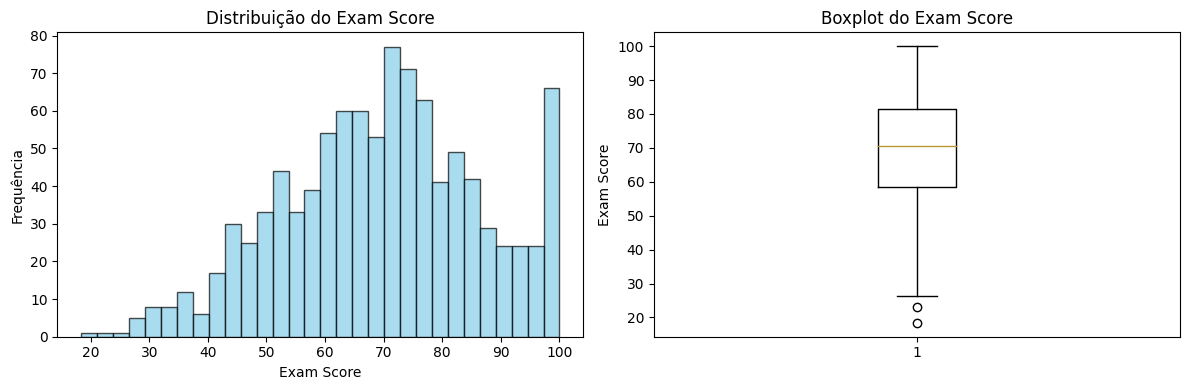

📊 Estatísticas do exam_score:
Média: 69.60
Mediana: 70.50
Desvio padrão: 16.89
Min: 18.40
Max: 100.00


In [5]:
# Visualização da distribuição da variável target
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_clean['exam_score'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribuição do Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.boxplot(df_clean['exam_score'])
plt.title('Boxplot do Exam Score')
plt.ylabel('Exam Score')

plt.tight_layout()
plt.show()

print(f"📊 Estatísticas do exam_score:")
print(f"Média: {df_clean['exam_score'].mean():.2f}")
print(f"Mediana: {df_clean['exam_score'].median():.2f}")
print(f"Desvio padrão: {df_clean['exam_score'].std():.2f}")
print(f"Min: {df_clean['exam_score'].min():.2f}")
print(f"Max: {df_clean['exam_score'].max():.2f}")


##  Algoritmos de Machine Learning Utilizados

###  **Regressão** (Predição de valores contínuos - exam_score)
- **Linear Regression (lr)**: Modelo linear básico
- **Ridge Regression (ridge)**: Linear com regularização L2
- **Lasso Regression (lasso)**: Linear com regularização L1
- **Elastic Net (en)**: Combinação de Ridge e Lasso
- **Random Forest (rf)**: Ensemble de árvores de decisão
- **Gradient Boosting (gbr)**: Boosting sequencial

- **Extra Trees (et)**: Random Forest com mais aleatoriedade
- **AdaBoost (ada)**: Adaptive boosting
- **Decision Tree (dt)**: Árvore de decisão simples


In [6]:
# Setup do PyCaret para regressão
print("🚀 Configurando o PyCaret para regressão...")

reg = setup(
    data=df_clean,
    target='exam_score',
    train_size=0.8,
    normalize=True,
    normalize_method='zscore',
    transformation=True,
    transformation_method='yeo-johnson',
    remove_outliers=True,
    outliers_threshold=0.05,
)



print("✅ Setup do PyCaret concluído!")
print(f"📊 Dados de treino: {len(get_config('X_train'))} amostras")
print(f"📊 Dados de teste: {len(get_config('X_test'))} amostras")
print(f"🎯 Variável target: {get_config('target_param')}")
print(f"📋 Features: {len(get_config('X_train').columns)} variáveis")


🚀 Configurando o PyCaret para regressão...


,Description,Value
0,Session id,3113
1,Target,exam_score
2,Target type,Regression
3,Original data shape,"(1000, 15)"
4,Transformed data shape,"(960, 23)"
5,Transformed train set shape,"(760, 23)"
6,Transformed test set shape,"(200, 23)"
7,Numeric features,8
8,Categorical features,6
9,Preprocess,True


✅ Setup do PyCaret concluído!
📊 Dados de treino: 800 amostras
📊 Dados de teste: 200 amostras
🎯 Variável target: exam_score
📋 Features: 14 variáveis


In [7]:
# Comparação de modelos de regressão
print("🔍 Comparando diferentes modelos de regressão...")

# Treinar e comparar múltiplos modelos
best_models = compare_models(
    include=[
        'lr',      # Linear Regression
        'ridge',   # Ridge Regression
        'lasso',   # Lasso Regression
        'en',      # Elastic Net
        'rf',      # Random Forest
        'gbr',     # Gradient Boosting
        'lightgbm', # LightGBM
        'et',      # Extra Trees
        'ada',     # AdaBoost
        'dt'       # Decision Tree
    ],
    sort='RMSE',
    n_select=3
)

print("✅ Comparação de modelos concluída!")
print("🏆 Top 3 modelos selecionados:")
print(best_models)


🔍 Comparando diferentes modelos de regressão...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,4.2047,27.9666,5.2792,0.8978,0.0827,0.0654,0.2820
lr,Linear Regression,4.2163,28.0638,5.2884,0.8975,0.0827,0.0655,0.5350
gbr,Gradient Boosting Regressor,4.5595,33.0192,5.7395,0.8787,0.0914,0.0716,0.0610
lasso,Lasso Regression,4.6856,34.3111,5.8463,0.8749,0.0945,0.0745,0.0500
lightgbm,Light Gradient Boosting Machine,4.7091,36.0131,5.9967,0.8675,0.0963,0.0743,0.1200
rf,Random Forest Regressor,5.1456,40.7214,6.3774,0.8510,0.1025,0.0814,0.1130
et,Extra Trees Regressor,5.1577,41.3313,6.4202,0.8484,0.1048,0.0826,0.1000
ada,AdaBoost Regressor,5.9313,52.5542,7.2439,0.8072,0.1155,0.0936,0.0560
en,Elastic Net,6.4986,64.1730,7.9951,0.7662,0.1336,0.1075,0.0540
dt,Decision Tree Regressor,7.2755,85.0580,9.2099,0.6883,0.1464,0.1143,0.0410


✅ Comparação de modelos concluída!
🏆 Top 3 modelos selecionados:
[Ridge(random_state=3113), LinearRegression(n_jobs=-1), GradientBoostingRegressor(random_state=3113)]


In [8]:
# 🎯 Treinamento e otimização do melhor modelo no PyCaret
print("🎯 Treinando o melhor modelo...")

# Selecionar o melhor modelo (primeiro da lista de melhores modelos)
best_model = best_models[0]

# 🔧 Otimizar hiperparâmetros do melhor modelo encontrado
print("🔧 Otimizando hiperparâmetros...")
tuned_model = tune_model(best_model, optimize='RMSE', n_iter=20)

# 🤝 Criar ensemble (conjunto) a partir do modelo otimizado
# ⚠️ Mudamos o nome da variável para 'ensemble_best' para não sobrescrever a função 'ensemble_model'
print("🤝 Criando ensemble do modelo otimizado...")
ensemble_best = ensemble_model(tuned_model, method='Bagging')

# ✅ Finalização do processo
print("✅ Treinamento concluído!")
print(f"🏆 Melhor modelo: {type(best_model).__name__}")
print(f"🔧 Modelo otimizado: {type(tuned_model).__name__}")
print(f"🤝 Modelo ensemble: {type(ensemble_best).__name__}")


🎯 Treinando o melhor modelo...
🔧 Otimizando hiperparâmetros...


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2274,27.0641,5.2023,0.8880,0.0801,0.0651
1,4.1717,25.3816,5.0380,0.8905,0.0727,0.0598
2,3.9886,25.7326,5.0727,0.8935,0.0730,0.0579
3,3.8960,23.9286,4.8917,0.9098,0.0845,0.0626
4,4.5341,32.9773,5.7426,0.8812,0.0837,0.0663
5,4.1044,24.9484,4.9948,0.9168,0.0859,0.0669
6,4.1311,30.5477,5.5270,0.9019,0.0816,0.0647
7,4.3989,32.6480,5.7138,0.8870,0.0813,0.0663
8,4.5090,31.1642,5.5825,0.8990,0.0996,0.0777


Fitting 10 folds for each of 20 candidates, totalling 200 fits
🤝 Criando ensemble do modelo otimizado...


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2162,27.0135,5.1975,0.8882,0.0800,0.0649
1,4.1046,24.9802,4.9980,0.8922,0.0717,0.0585
2,3.9619,25.9763,5.0967,0.8925,0.0733,0.0574
3,3.8812,23.9778,4.8967,0.9096,0.0848,0.0625
4,4.5416,33.3245,5.7727,0.8800,0.0841,0.0663
5,4.0352,24.4254,4.9422,0.9185,0.0846,0.0656
6,4.1026,30.1918,5.4947,0.9031,0.0812,0.0641
7,4.3342,31.6512,5.6259,0.8904,0.0804,0.0654
8,4.4701,30.8703,5.5561,0.9000,0.0992,0.0769


✅ Treinamento concluído!
🏆 Melhor modelo: Ridge
🔧 Modelo otimizado: Ridge
🤝 Modelo ensemble: BaggingRegressor


In [9]:
# 📊 Avaliação dos modelos
print("📊 Avaliando performance dos modelos...")

# Avaliar o modelo otimizado
print("\n🔧 Performance do modelo otimizado:")
evaluate_model(tuned_model)

# Avaliar o modelo ensemble
print("\n🤝 Performance do modelo ensemble:")
evaluate_model(ensemble_best)  # <- aqui era ensemble_model

# Fazer predições no conjunto de teste
print("\n🎯 Fazendo predições...")
predictions = predict_model(tuned_model)
ensemble_predictions = predict_model(ensemble_best)  # <- aqui era ensemble_model

print("✅ Avaliação concluída!")
print(f"📈 Predições do modelo otimizado: {len(predictions)} amostras")
print(f"📈 Predições do ensemble: {len(ensemble_predictions)} amostras")


📊 Avaliando performance dos modelos...

🔧 Performance do modelo otimizado:


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


🤝 Performance do modelo ensemble:


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


🎯 Fazendo predições...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,4.6864,34.1538,5.8441,0.8877,0.0962,0.0748


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,4.7086,34.3477,5.8607,0.8871,0.0965,0.0750


✅ Avaliação concluída!
📈 Predições do modelo otimizado: 200 amostras
📈 Predições do ensemble: 200 amostras


🔍 Analisando importância das features...


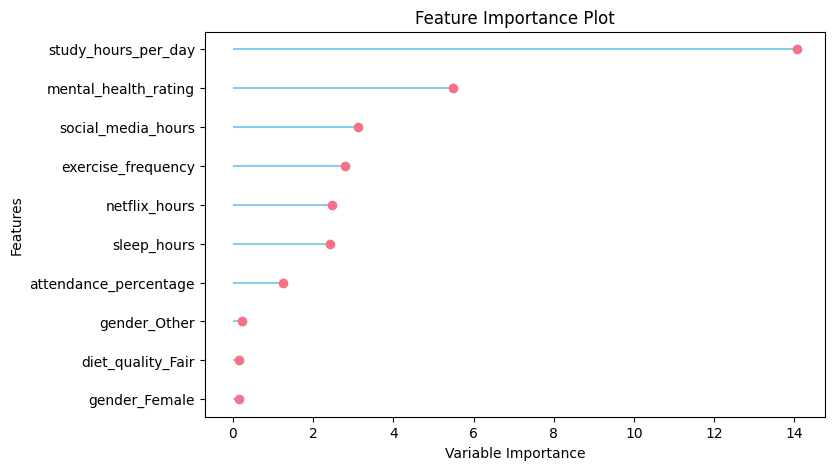

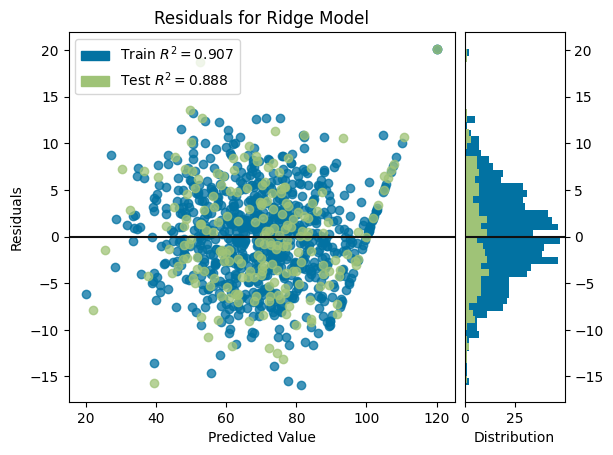

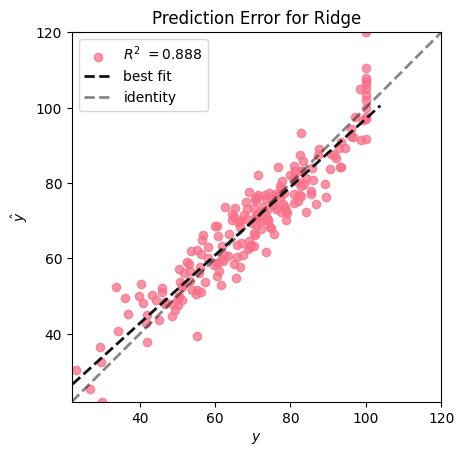

In [11]:
# Análise de importância das features
print("🔍 Analisando importância das features...")

# Plotar importância das features para o modelo otimizado
plot_model(tuned_model, plot='feature')

# Plotar resíduos
plot_model(tuned_model, plot='residuals')

# Plotar predições vs valores reais
plot_model(tuned_model, plot='error')

